# Dynamic Programming



## Question 1: Asset Market Equilibrium
### Question A: Define a financial market equilibrium and the system of equations

__Definitions__:

* $A_{h a}$ : the amount of asset a hold by agent h  
* $r_{a s}$ : the realisation of asset a in state s  
* $C_{h}^{t}$: the consumption of agent h in period t  
* $e_{h s}^{t}$: the endowment of agent h in period t in state s  
* $p_{a}$: the price of asset a  
      
      

__The financial market equilibrium__  assuming that we are in a close  can be summarized by the following system of equations:  
* $A_{1 1}$ + $A_{2 1}$ = 0  
* $A_{1 2}$ + $A_{2 2}$ = 0  
      
__The agents' problem and the resulting FOC__  
For each agent $h$ the maximization problem is the following:  
      
$ Max_{A_{h 1}  A_{h_2}} U_c$ = $\frac{C_{h}^{0} .^{1-\sigma}}{1-\sigma}$ + $\frac{1}{4}$ $\sum_{S=1}^{4} {\frac{C_{h}^{1(s)} .^{1-\\sigma}}{1-\sigma}}$  
      
__s.t. (budget constraints in periods 0 and 1)__  
      
* $e_{h}^{0} = C_{h}^{0} + A_{h,1}*p_1 + A_{h,2}*p_2$  
* $e_{h,s}^{1} + r_{1,s}*A_{h,1} + r_{2 s}*A_{h,2}= C_{h}^{1}$  
      
      
__Reorganizing:__  
      
$Max_{A_{h,1}, A_{h,2}} U_c$ = $\frac{(e_{h}^{0} - A_{h,1}*p_1 -A_{h,2}*p_2$) .^{1-\sigma}}{1-\sigma}$ + $\frac{1}{4}$ $\sum_{S=1}^{4} {\frac{(e_{h}^{1} + r_{1,s}*A_{h,1} + r_{2,s}*A_{h,2}) .^{1-\sigma}}{1-\sigma}}$

__Resulting in the following FOC conditions (similar for each agent h) wrt $A_{h,1}$ and $A_{h,2}$:__  

Asset 1:   

* $ -p_{1} . {(e_{h}^{0} - A_{h,1}*p_1 -A_{h,2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{1,s} {(e_{h}^{1} + r_{1,s}*A_{h,1} + r_{2,s}*A_{h,2}}) ^{- \sigma}$  
      
Asset 2:   
      
* $ -p_{2} . {(e_{h}^{0} - A_{h,1}*p_1 -A_{h,2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{2,s} {(e_{h}^{1} + r_{2 s}*A_{h,1} + r_{2 s}*A_{h,2}}) ^{- \sigma}$  
      
      
      
__With 2 agents and 2 assets we therefore have a non-linear system of 6 equations and 6 unknowns. Namely:__  
      
* $ -p_{1} . {(e_{1}^{0} - A_{1 1}*p_1 -A_{1 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{1 s} {(e_{1 s}^{1} + r_{1 s}*A_{1 1} + r_{2 s}*A_{1 2}}) ^{- \\sigma}$  
* $ -p_{2} . {(e_{1}^{0} - A_{1 1}*p_1 -A_{1 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{2 s} {(e_{1 s}^{1} + r_{1 s}*A_{1 1} + r_{2 s}*A_{1 2}}) ^{- \sigma}$  
* $ -p_{1} . {(e_{2}^{0} - A_{2 1}*p_1 -A_{2 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{1 s} {(e_{2 s}^{1} + r_{1 s}*A_{2 1} + r_{2 s}*A_{2 2}}) ^{- \sigma}$  
* $ -p_{2} . {(e_{2}^{0} - A_{2 1}*p_1 -A_{2 2}*p_2) .^{-\sigma}}$ + $\frac{1}{4}$ . $\sum_{s=1}^{4}$ $r_{2 s} {(e_{2 s}^{1} + r_{1 s}*A_{2 1} + r_{2 s}*A_{2 2}}) ^{- \sigma}$  
* $A_{1 1}$ + $A_{2 1}$ = 0  
* $A_{1 2}$ + $A_{2 2}$ = 0  
      
     

### Question b: Use Python to compute the equilibrium prices and allocations

In [ ]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import math
     
from scipy.stats import norm

In [ ]:
# Initialize (pb set specific)
e1 = np.array([1, 1, 2, 1, 2])
e2 = np.array([1, 3, 1, 3, 1])
r1 = np.array([1, 1, 1, 1])
r2 = np.array([1, 1, 1.5, 1.5])


def solve_asset_market_eq(e1, e2, r1, r2, γ):

    parameters = (e1, e2, r1, r2)

# System of equations  
    def system(x,*parameters):
        p1, p2, A11, A12, A21, A22 = x
        e1,e2,r1,r2 = parameters
        return [A11 + A21, A12 + A22, \
    -p1*(e1[0] - p1*A11 - p2*A12)**(-γ) + \
     1/4*np.sum(r1*(e1[1:] + r1*A11 + r2*A12)**(-γ)),\
     -p2*(e1[0] - p1*A11 - p2*A12)**(-γ) + \
     1/4*np.sum(r2*(e1[1:] + r1*A11 + r2*A12)**(-γ)),\
     -p1*(e2[0] - p1*A21 - p2*A22)**(-γ) + \
     1/4*np.sum(r1*(e2[1:] + r1*A21 + r2*A22)**(-γ)),\
     -p2*(e2[0] - p1*A21 - p2*A22)**(-γ) + \
     1/4*np.sum(r2*(e2[1:] + r1*A21 + r2*A22)**(-γ))]
   
    guess = np.array([1, 0, -0.5, 0.5, 0, 0])
    parameters = (e1, e2, r1, r2)
    sol = sp.optimize.root(system, guess, method = 'hybr', args=(parameters))
    
#print(sol.x)

    return(sol.x)

solve_asset_market_eq(e1, e2, r1, r2, np.array([2.0]))

## Question 3: Ramsey I

In [ ]:

# Choose parameters
n=50
k = np.linspace(0.1,10,n)
V_guess = np.zeros((2, len(k)))
β = 0.9
tol = 1e-6


def utility(x):
    if x > 0:
        return np.log(x)
    else:
        return -5000

# Update the value function
## Define the 2 value functions
T1 = lambda i, j: utility(0.9*k[i]**0.3 + 0.3*k[i] - k[j]) + β *(0.5 *V_guess[0,j] + 0.5 * V_guess[1,j])
T2 = lambda i, j: utility(1.1*k[i]**0.3 + 0.3*k[i] - k[j]) + β *(0.5 *V_guess[0,j] + 0.5 * V_guess[1,j])

# to loop over all i
# artificially i = 1
iter = 0
while True:
    iter +=1

    All_T1 = np.zeros((len(k), len(k)))
    All_T2 = np.zeros((len(k), len(k)))
    for i in range(len(k)):
        for j in range(len(k)):
            All_T1[i,j] = T1(i,j) 
            All_T2[i,j] = T2(i,j) 

    # Compute max value function
    # For all k, choose the best k+1 (saving in the future, given k[i], represented by k[j])
    V1 = np.amax(All_T1, axis=1)
    V2 = np.amax(All_T2, axis=1)

    # Check that improvement
    # Want to compute the norm of the error (magnitude of the error)
    e1 = np.linalg.norm(V1 - V_guess[0,:])
    e2 = np.linalg.norm(V2 - V_guess[1,:])
    e = e1 + e2
    #print(e)
    if e < tol:
        break

    V_guess[0,:] = V1
    V_guess[1,:] = V2

#print(\Nb iterations\, \\\t\, iter, \\\n\, \error\, \\\t\, e)

plt.plot(k, V_guess[0,:])
plt.plot(k, V_guess[1,:])

plt.show()


## Question 4: Stochastic Ramsey Model: time iteration collocation

### Question A: Discrete Shocks

##### Linear Piecewise Collocation

* Piecewise linear collocation = global method to solve the Ramsey problem
* Criterion: the solution satisfies the EE exactly on a grid of points rather than only at the SS
* We choose n points and interpolate linearly between these points


In [65]:


# Initial Step: set grid, initial policy and error tolerance
n=20
maxiter = 10
β = 0.9
tol = 1e-6

'''
Solve for each K_j the system of non-linear equations
R(Kj) = u'(f(K_j) - V_guess_j) - β . f'(V_guess_j) . u'(f(V_guess_j) - PL(V_guess_j, K, V_guess)) = 0
PK(x, K, V_guess) = [(V_guess_{j+1} - x). V_guess_j + (x - V_guess_j) . V_guess_{j+1}] / [(V_guess_{j+1} - (V_guess_{j}]
'''

# Production function in states 1 & 2
def f(k, s):
    if s == 0:
        return(0.9*k**(0.3) + 0.3*k)
    if s == 1:
        return(1.1*k**(0.3) + 0.9*k)

    
# Derivates of the production functions
def fp(k, s):
    if s == 0:
        return(np.where(k>0, 0.3*0.9*np.power(k, -0.7) + 0.3, 5000))
    if s == 1:
        return(np.where(k>0, 0.3*1.1*np.power(k, -0.7) + 0.9, 5000))

def utility(x):
    return(np.where(x>0, np.log(x), -5000))
    
# U'
def putility(x):
    return(np.where(x>0, np.divide(1, x), 5000)) 

    
# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    return(np.interp(x, k, p_guess))


# Expected Utility in the future = 0.5 U1 + 0.5 U2
def euler(x, *parameters):
    f, fp, putility, β, p_guess, k = parameters
    p_guess1 = p_guess[:n]
    p_guess2 = p_guess[n:]
    x1 = x[:n]
    x2 = x[n:]
    
    return np.append(putility(f(k, 0) - x1) - β*(0.5*fp(x1,0)*putility(f(x1, 0) \
                     - PL(x1, k, p_guess1)) + 0.5*fp(x1,1)*putility(f(x1, 1) - PL(x1, k, p_guess1))),
                     putility(f(k, 1) - x2) - β*(0.5*fp(x2,0)*putility(f(x2, 0) \
                     - PL(x2, k, p_guess2)) + 0.5*fp(x2,1)*putility(f(x2, 1) - PL(x2, k, p_guess2))))




Number of iterations 	 1 
 error 	 11.448326804789401


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


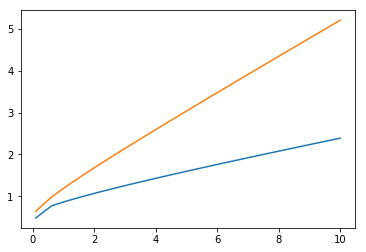

'\nNeed to make sure that the solver starts somewhere with initial consumption, otherwise\nthe solver brings you in the other direction\n'

In [66]:

# Update your guess
p_guess = np.ones(2*len(k))
k = np.linspace(0.1,10,n)

iter = 0

while True:
    iter +=1

    parameters = f, fp, putility, β, p_guess, k
    solve = sp.optimize.root(euler, p_guess, method = "hybr", args = (parameters))
    kprime = solve.x
    #print(kprime)
    
    e = np.linalg.norm(kprime - p_guess)
    if e < tol:
        break
    p_guess = kprime
    print("Number of iterations", "\t", iter, "\n", "error", "\t", e)
    #guess = p_guess*1.

# print(Kprime)
plt.plot(k,kprime[:n])
plt.plot(k,kprime[n:])
plt.show()

'''
Need to make sure that the solver starts somewhere with initial consumption, otherwise
the solver brings you in the other direction
'''

#### Polynomial of degree 5

In [67]:
from numpy.polynomial import polynomial as P

# Initial Step: set grid, initial policy and error tolerance
n=200
maxiter = 100
β = 0.9
tol = 1e-6


    
# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    c = P.polyfit(k, p_guess, 5)
    return(c[0]*x**0 + c[1]*x + c[2]*x**2 + c[3]*x**3 + c[4]*x**4)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


[0.48047744 0.55345463 0.61410753 0.66734018 0.68553894 0.7001081
 0.71415304 0.72776522 0.7410099  0.75393664 0.76658413 0.77898336
 0.79115954 0.80313421 0.81492478 0.82654666 0.83801304 0.84933546
 0.86052406 0.87158783 0.8825348  0.89337216 0.9041064  0.9147434
 0.92528851 0.93574661 0.94612217 0.95641929 0.96664177 0.9767931
 0.98687653 0.99689507 1.00685152 1.0167485  1.02658845 1.03637365
 1.04610625 1.05578826 1.06542158 1.075008   1.08454918 1.09404674
 1.10350215 1.11291687 1.12229222 1.13162949 1.1409299  1.15019461
 1.15942471 1.16862126 1.17778525 1.18691764 1.19601934 1.20509122
 1.21413411 1.22314882 1.2321361  1.24109669 1.25003129 1.25894058
 1.2678252  1.27668578 1.28552291 1.29433718 1.30312913 1.31189929
 1.32064819 1.32937632 1.33808416 1.34677216 1.35544079 1.36409045
 1.37272158 1.38133458 1.38992982 1.3985077  1.40706857 1.41561279
 1.42414069 1.43265262 1.44114889 1.44962981 1.45809568 1.4665468
 1.47498346 1.48340592 1.49181445 1.50020933 1.50859079 1.51695909

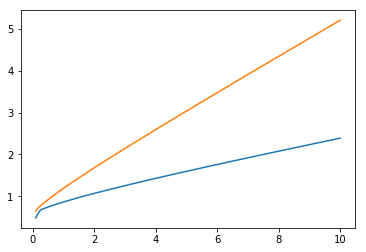

In [69]:
# Update your guess
p_guess = np.ones(2*len(k))
k = np.linspace(0.1,10,n)

iter = 0
while True:
    iter +=1
    parameters = f, fp, putility, β, p_guess, k
    solve = sp.optimize.root(euler, p_guess, method = "hybr", args = (parameters))
    kprime = solve.x
    print(kprime)
    
    e = np.linalg.norm(kprime - p_guess)
    if e < tol:
        break
    p_guess = kprime
    print("Number of iterations", "\t", iter, "\n", "error", "\t", e)
    #guess = p_guess*1.

# print(Kprime)
plt.plot(k,kprime[:n])
plt.plot(k,kprime[n:])
plt.show()

#### Cubic Splines

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in power
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in power


[0.48047744 0.55345463 0.61410753 0.66734018 0.68553894 0.70010809
 0.71415304 0.72776522 0.7410099  0.75393664 0.76658413 0.77898336
 0.79115954 0.80313421 0.81492478 0.82654666 0.83801304 0.84933546
 0.86052406 0.87158783 0.8825348  0.89337216 0.9041064  0.9147434
 0.92528851 0.93574661 0.94612217 0.95641929 0.96664177 0.9767931
 0.98687653 0.99689507 1.00685152 1.0167485  1.02658845 1.03637365
 1.04610625 1.05578826 1.06542158 1.075008   1.08454918 1.09404674
 1.10350215 1.11291687 1.12229222 1.13162949 1.1409299  1.15019461
 1.15942471 1.16862126 1.17778525 1.18691764 1.19601934 1.20509122
 1.21413411 1.22314882 1.2321361  1.24109669 1.25003129 1.25894058
 1.2678252  1.27668578 1.28552291 1.29433718 1.30312913 1.31189929
 1.32064819 1.32937632 1.33808416 1.34677216 1.35544079 1.36409045
 1.37272158 1.38133458 1.38992982 1.3985077  1.40706857 1.41561279
 1.42414069 1.43265262 1.44114889 1.44962981 1.45809568 1.4665468
 1.47498346 1.48340592 1.49181445 1.50020933 1.50859079 1.5169590

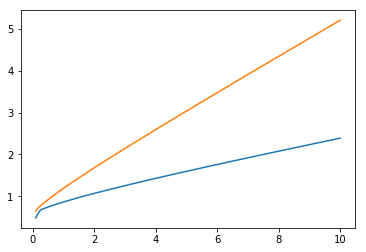

In [70]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    c = CubicSpline(k, p_guess)
    return(c(x))



# Update your guess
p_guess = np.ones(2*len(k))
k = np.linspace(0.1,10,n)

iter = 0
while True:
    iter +=1
    parameters = f, fp, putility, β, p_guess, k
    solve = sp.optimize.root(euler, p_guess, method = "hybr", args = (parameters))
    kprime = solve.x
    print(kprime)
    
    e = np.linalg.norm(kprime - p_guess)
    if e < tol:
        break
    p_guess = kprime
    print("Number of iterations", "\t", iter, "\n", "error", "\t", e)
    #guess = p_guess*1.

# print(Kprime)
plt.plot(k,kprime[:n])
plt.plot(k,kprime[n:])
plt.show()

### Question B: AR(1) shocks

Now suppose that $f(k, 1) = exp(A_t) * k^{0.3} + 0.5*k$


And that $A_t = 0.9 A_{t-1} + \epsilon_t$

In [1]:
#From BootCamp 2018

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
from scipy.stats import norm
import scipy.integrate as integrate

def rouwen(rho, mu, step, num):
    '''
    Adapted from Lu Zhang and Karen Kopecky. Python by Ben Tengelsen.
    Construct transition probability matrix for discretizing an AR(1)
    process. This procedure is from Rouwenhorst (1995), which works
    well for very persistent processes.

    INPUTS:
    rho  - persistence (close to one)
    mu   - mean and the middle point of the discrete state space
    step - step size of the even-spaced grid
    num  - number of grid points on the discretized process

    OUTPUT:
    dscSp  - discrete state space (num by 1 vector)
    transP - transition probability matrix over the grid
    '''

    # discrete state space
    dscSp = np.linspace(mu - (num - 1) / 2 * step, mu + (num - 1) / 2 * step,
                        num).T

    # transition probability matrix
    q = p = (rho + 1)/2.
    transP = np.array([[p**2, p*(1-q), (1-q)**2],
                      [2*p*(1-p), p*q+(1-p)*(1-q), 2*q*(1-q)],
                      [(1-p)**2, (1-p)*q, q**2]]).T

    while transP.shape[0] <= num - 1:

        # see Rouwenhorst 1995
        len_P = transP.shape[0]
        transP = p*np.vstack((np.hstack((transP, np.zeros((len_P, 1)))), np.zeros((1, len_P+1)))) \
        + (1 - p)*np.vstack((np.hstack((np.zeros((len_P, 1)), transP)), np.zeros((1, len_P+1)))) \
        + (1 - q)*np.vstack((np.zeros((1, len_P+1)), np.hstack((transP, np.zeros((len_P, 1)))))) \
        + q * np.vstack((np.zeros((1, len_P+1)), np.hstack((np.zeros((len_P, 1)), transP))))

        transP[1:-1] /= 2.

    # ensure columns sum to 1
    if np.max(np.abs(np.sum(transP, axis=1) - np.ones(transP.shape))) >= 1e-12:
        print('Problem in rouwen routine!')
        return None
    else:
        return transP.T, dscSp


def tauchenhussey(N, mu, rho, sigma, baseSigma):
    """
    Function tauchenhussey

    Purpose:    Finds a Markov chain whose sample paths
                approximate those of the AR(1) process
                    z(t+1) = (1-rho)*mu + rho * z(t) + eps(t+1)
                where eps are normal with stddev sigma

    Format:     {Z, Zprob} = TauchenHussey(N,mu,rho,sigma,m)

    Input:      N         scalar, number of nodes for Z
            mu        scalar, unconditional mean of process
            rho       scalar
            sigma     scalar, std. dev. of epsilons
            baseSigma scalar, std. dev. used to calculate Gaussian
            quadrature weights and nodes, i.e. to build the
            grid. I recommend that you use
            baseSigma = w*sigma +(1-w)*sigmaZ where sigmaZ = \
                    sigma/sqrt(1-rho^2),
                and w = 0.5 + rho/4. Tauchen & Hussey recommend
                baseSigma = sigma, and also mention baseSigma = sigmaZ.

    Output:     Z       N*1 vector, nodes for Z
                Zprob   N*N matrix, transition probabilities

    Author:     Benjamin Tengelsen, Carnegie Mellon University (python)
                Martin Floden, Stockholm School of Economics (original)
                January 2007 (updated August 2007)

    This procedure is an implementation of Tauchen and Hussey's
    algorithm, Econometrica (1991, Vol. 59(2), pp. 371-396)
    """

    Z = np.zeros((N, 1))
    Zprob = np.zeros((N, N))
    [Z, w] = gaussnorm(N, mu, baseSigma ** 2)
    for i in range(N):
        for j in range(N):
            EZprime = (1 - rho) * mu + rho * Z[i]
            Zprob[i, j] = (w[j] * st.norm.pdf(Z[j], EZprime, sigma) /
                           st.norm.pdf(Z[j], mu, baseSigma))

    for i in range(N):
        Zprob[i, :] = Zprob[i, :] / sum(Zprob[i, :])

    return Z.T, Zprob


def gaussnorm(n, mu, s2):
    """
    Find Gaussian nodes and weights for the normal distribution
    n  = # nodes
    mu = mean
    s2 = variance
    """
    [x0, w0] = gausshermite(n)
    x = x0 * np.sqrt(2. * s2) + mu
    # print(s2,mu)
    # print(x)
    w = w0 / np.sqrt(np.pi)
    return [x, w]


def gausshermite(n):
    """
    Gauss Hermite nodes and weights following 'Numerical Recipes for C'
    """

    MAXIT = 10
    EPS = 3e-14
    PIM4 = 0.7511255444649425

    x = np.zeros((n, 1))
    w = np.zeros((n, 1))

    m = int((n + 1) / 2)
    for i in range(m):
        if i == 0:
            z = np.sqrt((2. * n + 1) - 1.85575 * (2. * n+1) ** (-0.16667))
        elif i == 1:
            z = z - 1.14 * (n ** 0.426) / z
        elif i == 2:
            z = 1.86 * z - 0.86 * x[0]
        elif i == 3:
            z = 1.91 * z - 0.91 * x[1]
        else:
            z = 2 * z - x[i - 1]

        for iter in range(MAXIT):
            p1 = PIM4
            p2 = 0.
            for j in range(n):
                p3 = p2
                p2 = p1
                p1 = (z * np.sqrt(2. / (j + 1)) * p2 - np.sqrt(float(j) /
                                                               (j + 1)) * p3)
            pp = np.sqrt(2. * n) * p2
            z1 = z
            z = z1 - p1 / pp
            if np.absolute(z - z1) <= EPS:
                break

        if iter > MAXIT:
            error('too many iterations'), end
        x[i, 0] = z
        x[n - i - 1, 0] = -z
        w[i, 0] = 2. / pp / pp
        w[n - i - 1, 0] = w[i]

    x = x[::-1]
    return [x, w]


def integrand(x, sigma_z, sigma, rho, mu, z_j, z_jp1):
    """
    Integrand in the determination of transition probabilities from the Adda-
    Cooper method.
    """
    val = (np.exp((-1 * ((x - mu) ** 2)) / (2 * (sigma_z ** 2)))
           * (norm.cdf((z_jp1 - (mu * (1 - rho)) - (rho * x)) / sigma)
               - norm.cdf((z_j - (mu * (1 - rho)) - (rho * x)) / sigma)))

    return val


def addacooper(N, mu, rho, sigma):
    """
    Function addacooper

    Purpose:    Finds a Markov chain whose sample paths
                approximate those of the AR(1) process
                    z(t+1) = (1-rho)*mu + rho * z(t) + eps(t+1)
                where eps are normal with stddev sigma

    Format:     {Z, Zprob} = addacooper(N, mu, rho, sigma)

    Input:      N     = scalar, number of nodes for Z
                mu    = scalar, unconditional mean of process
                rho   = scalar, persistence of the AR(1) process
                sigma = scalar, std. dev. of epsilons

    Output:     z_grid = N*1 vector, nodes for Z
                pi     = N*N matrix, transition probabilities

    Author:     Jason DeBacker, University of South Carolina (python)
                Jerome Adda ( Bocconi) and Russell Cooper (Penn State)
                (original)


    This procedure is an implementation of a modified version of Tauchen
    and Hussey's algorithm, Econometrica (1991, Vol. 59(2), pp. 371-396),
    this modification appears in Adda, Jerome and Russell Cooper, *Dynamic
    Economics: Quantitative Methods and Applications, MIT Press (2003)
        """
    # Compute std dev of the stationary distribution of z
    sigma_z = sigma / ((1 - rho ** 2) ** (1 / 2))

    # Compute cut-off values
    z_cutoffs = (sigma_z * norm.ppf(np.arange(N + 1) / N)) + mu

    # compute grid points for z
    z_grid = ((N * sigma_z * (norm.pdf((z_cutoffs[:-1] - mu) / sigma_z)
                              - norm.pdf((z_cutoffs[1:] - mu) / sigma_z)))
              + mu)

    # compute transition probabilities
    pi = np.empty((N, N))
    for i in range(N):
        for j in range(N):
            results = integrate.quad(integrand, z_cutoffs[i], z_cutoffs[i + 1],
                                     args=(sigma_z, sigma, rho, mu,
                                           z_cutoffs[j], z_cutoffs[j + 1]))
            pi[i, j] = (N / np.sqrt(2 * np.pi * sigma_z ** 2)) * results[0]

    return z_grid, pi

# define function that we will integrate over
def integrand(x, sigma_z, sigma_eps, rho, mu, z_j, z_jp1):
    val = (np.exp((-1 * ((x - mu) ** 2)) / (2 * (sigma_z ** 2)))
            * (norm.cdf((z_jp1 - (mu * (1 - rho)) - (rho * x)) / sigma_eps)
               - norm.cdf((z_j - (mu * (1 - rho)) - (rho * x)) / sigma_eps)))
    
    return val
     
# Simulate the Markov process - will make this a function so can call later
def sim_markov(z_grid, pi, num_draws):
    # draw some random numbers on [0, 1]
    u = np.random.uniform(size=num_draws)

    # Do simulations
    z_discrete = np.empty(num_draws)  # this will be a vector of values 
    # we land on in the discretized grid for z
    N = z_grid.shape[0]
    oldind = int(np.ceil((N - 1) / 2)) # set initial value to median of grid
    z_discrete[0] = z_grid[oldind]  
    for i in range(1, num_draws):
        sum_p = 0
        ind = 0
        while sum_p < u[i]:
            sum_p = sum_p + pi[ind, oldind]
            #             print('inds =  ', ind, oldind)
            ind += 1
        if ind > 0:
            ind -= 1
        z_discrete[i] = z_grid[ind]
        oldind = ind
                            
    return z_discrete
        

In [49]:
# U
def utility(x):
    return(np.where(x>0, np.log(x), -5000))
    
# U'
def putility(x):
    return(np.where(x>0, np.divide(1, x), 5000)) 


# Policy rule = approximated through piecewise linear approx
def PL(x, k, p_guess):
    return(np.interp(x, k, p_guess))


# Expected Utility in the future = 0.5 U1 + 0.5 U2
# BEUG SOLVING IN PROCESS
def euler(x, *parameters):
    f, fp, putility, β, p_guess, k = parameters

    euler = []
    for s_today in range(Ns):
        print("Today's state", s_today)
        high_index = s_today + Nk  
        x_today = x[s_today:high_index]
        current_utility = putility(f(k,s_today) - x_today)
        p_guess_s = p_guess[s_today:high_index]
        future_utility = np.zeros(Nk)
        
        policy = β * PL(x_today, k, p_guess_s)
        print("policy", policy)
        
        # For tomorrow's states
        tp = TP[s_today,:]
        print("transition_proba", tp)
        add_utility = β * tp *fp(x_today, )
        
        for s_tomorrow in range(Ns):
            print("Tomorrow's state", s_tomorrow)
            
            x_tomorrow = x[s_today:high_index]
            add_utility = (β * tp * fp(x_today, s_tomorrow) * putility(f(x_today, s_tomorrow)))
            print("Future utility", future_utility)
            print("Additional utility", add_utility)
            future_utility = future_utility + add_utility
            print(future_utility)
        print("Future u together", future_utility)
        util = current_utility - policy + future_utility
        print(util)
        euler.append(util)
    euler = np.reshape(euler, Nk*Ns, order='F')
    return(euler)


# Production function
def f(k, s):
    a = A_grid[0,s]
    return(np.exp(a)*k**(0.3) + 0.5*k)


# Derivates of the production functions
def fp(k, s):
    a = A_grid[0,s]
    return(0.3 * np.exp(a) * np.power(k, 0.3) + 0.5)

def fpall(k):
    a = A_grid*np.ones(k)
    return(0.3 + np.exp(A_grid) * np.)

In [50]:
### Initiate the problem


# Nb of points in your k
Nk = 5
k_min = 0.02
k_max = 2.0
# Initiate parameters
maxiter = 100
β = 0.9
tol = 1e-6
# The shock process
σ = 0.1
μ = 0
ρ = 0.9
# Nb of points to discretize your state space on
Ns = 2
# Production function & derivative
f = lambda k, a: np.exp(a)*k**(0.3) + 0.5*k
f1 = lambda k, a: (0.3)*np.exp(a)*k**(-0.7) + 0.5

# Update your k st you have
k = np.linspace(k_min,k_max,Nk)
#k = k*np.ones((Ns,Nk))
from itertools import repeat
p_guess = np.ones((Nk*Ns))
#print(p_guess)
# Create base sigma (for tauchen function)
baseSigma = σ / (1- ρ **2)**(0.5)

# Create grid of shocks A_grid & Transition Probability matrix TP
A_grid, TP = tauchenhussey(Ns, μ, ρ, σ, baseSigma)

In [51]:

print("As of today, there is an issue in the loop of the euler equation. Solving in process, but as a matter of fact a bit too late...")


iter = 0
maxiter = 10
while True:
    iter +=1
    print("Number of iterations", iter)
    parameters = f, fp, putility, β, p_guess, k
    solve = sp.optimize.root(euler, p_guess, method = "hybr", args = (parameters))
    kprime = solve.x
    print(kprime)
    
    e = np.linalg.norm(kprime - p_guess)
    if e < tol:
        break
    if iter >= maxiter:
        break
    p_guess = kprime
    print("Number of iterations", "\t", iter, "\n", "error", "\t", e)
    #guess = p_guess*1.


As of today, there is an issue in the loop of the euler equation. Solving in process, but as a matter of fact a bit too late...
Number of iterations 1
Today's state 0
policy [0.9 0.9 0.9 0.9 0.9]
Tomorrow's state 0
transition_proba [9.99923158e-01 7.68418568e-05]


ValueError: operands could not be broadcast together with shapes (2,) (5,) 

In [60]:
np.dot(A_grid, np.ones((Nk)))

ValueError: shapes (1,2) and (5,) not aligned: 2 (dim 1) != 5 (dim 0)

In [60]:
f(k,s_today)

array([[0.31924949, 0.40073079, 0.45997715, 0.50873458, 0.55118723,
        0.58936396, 0.62441939, 0.65707996, 0.68783557, 0.71703386,
        0.7449314 , 0.77172349, 0.79756261, 0.82257033, 0.8468453 ,
        0.87046877, 0.89350856, 0.91602192, 0.93805767, 0.95965779,
        0.98085872, 1.00169224, 1.02218634, 1.04236573, 1.0622524 ,
        1.08186598, 1.1012241 , 1.12034265, 1.139236  , 1.1579172 ,
        1.17639813, 1.19468966, 1.21280174, 1.23074352, 1.24852344,
        1.26614928, 1.28362824, 1.30096702, 1.31817182, 1.33524845,
        1.35220229, 1.3690384 , 1.38576151, 1.40237604, 1.41888616,
        1.43529579, 1.4516086 , 1.46782809, 1.48395752, 1.5       ,
        1.51595847, 1.53183571, 1.54763435, 1.56335691, 1.57900576,
        1.59458316, 1.61009128, 1.62553216, 1.64090777, 1.65621997,
        1.67147055, 1.68666122, 1.70179361, 1.71686929, 1.73188975,
        1.74685643, 1.76177071, 1.77663391, 1.79144731, 1.80621212,
        1.82092951, 1.83560062, 1.85022654, 1.86

In [31]:
s_today

NameError: name 's_today' is not defined

In [33]:
s_today = 0

In [36]:
high_index = s_today + Ns
high_index

10